# CDF

Error reading /home/jithin/data/IMC/NewData/Tor/g711/AWS_TOR_IPERF_G711/7CapeTown-Seoul/caller/log.json: Expecting value: line 10991 column 1 (char 205914)


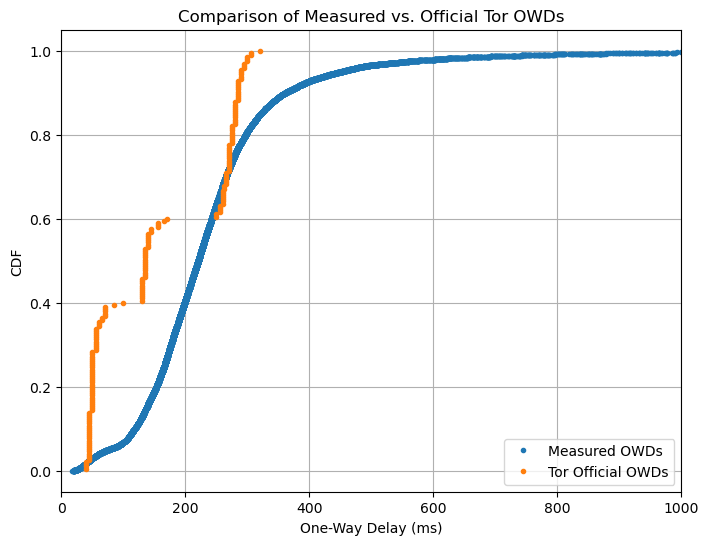

Measured OWD CDF at 400ms: 0.9276189037059424
Tor Official OWD CDF at 400ms: None


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# File paths
base_dir = "/home/haxor/data/IMC/NewData/Tor"
tor_latency_file = "/home/haxor/data/IMC/Analysis/Tor-Metrics/onionperf-latencies-2025-04-01-2025-05-11-public.csv"

# List to store extracted OWD values (ignoring zero values)
owd_values = []

# Traverse directory for log.json files
for root, _, files in os.walk(base_dir):
    for file in files:
        if file == "log.json":
            file_path = os.path.join(root, file)
            
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    
                    # Extract OWD, ignoring zero values
                    for entry in data:
                        if "owd" in entry:
                            try:
                                owd_caller_to_callee = float(entry["owd"]["caller_to_callee"])
                                owd_callee_to_caller = float(entry["owd"]["callee_to_caller"])
                                if owd_caller_to_callee > 0:
                                    owd_values.append(owd_caller_to_callee)
                                if owd_callee_to_caller > 0:
                                    owd_values.append(owd_callee_to_caller)
                            except (ValueError, TypeError):
                                continue
                        elif "rtt" in entry and "avg" in entry["rtt"]:
                            try:
                                owd_avg = float(entry["rtt"]["avg"]) / 2
                                if owd_avg > 0:
                                    owd_values.append(owd_avg)
                            except (ValueError, TypeError):
                                continue
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Convert measured OWDs to numpy array and compute CDF
owd_values = np.array(owd_values)
owd_values.sort()
cdf = np.arange(1, len(owd_values) + 1) / len(owd_values)

# Read Tor circuit latencies
tor_owd_values = []
try:
    tor_latency_df = pd.read_csv(tor_latency_file)

    if {'date', 'md'}.issubset(tor_latency_df.columns):
        tor_latency_df['owd_estimated'] = tor_latency_df['md'] / 2  # Convert median RTT to OWD
        tor_owd_values = tor_latency_df['owd_estimated'].dropna().values
        tor_owd_values = tor_owd_values[tor_owd_values > 0]  # Ignore zero values
        tor_owd_values.sort()
        tor_cdf = np.arange(1, len(tor_owd_values) + 1) / len(tor_owd_values)
    else:
        print("Required columns ('date', 'md') are missing in the dataset.")

except Exception as e:
    print(f"Error processing Tor latency file: {e}")

# Plot the CDFs
plt.figure(figsize=(8, 6))

# Plot Measured OWDs
if len(owd_values) > 0:
    plt.plot(owd_values, cdf, marker='.', linestyle='none', label="Measured OWDs")

# Plot Tor Official OWDs
if len(tor_owd_values) > 0:
    plt.plot(tor_owd_values, tor_cdf, marker='.', linestyle='none', label="Tor Official OWDs")

# Labels and title
plt.xlabel("One-Way Delay (ms)")
plt.ylabel("CDF")
plt.title("Comparison of Measured vs. Official Tor OWDs")

# X-axis rescaled till 1000 with step size of 200
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 200))

plt.legend()
plt.grid()
plt.show()

# Find where Measured OWD CDF crosses 400ms
measured_idx = np.searchsorted(owd_values, 400, side="left")
measured_cdf_value = cdf[measured_idx] if measured_idx < len(cdf) else None

# Find where Tor Official OWD CDF crosses 400ms
tor_idx = np.searchsorted(tor_owd_values, 400, side="left")
tor_cdf_value = tor_cdf[tor_idx] if tor_idx < len(tor_cdf) else None

# Print the results
print(f"Measured OWD CDF at 400ms: {measured_cdf_value}")
print(f"Tor Official OWD CDF at 400ms: {tor_cdf_value}")


# BoxPlot

Error reading /home/jithin/data/IMC/NewData/Tor/g711/AWS_TOR_IPERF_G711/7CapeTown-Seoul/caller/log.json: Expecting value: line 10991 column 1 (char 205914)
Error reading /home/jithin/data/IMC/NewData/Tor/AsiaCCS-Tor/batch-2/data_vms_speex_3_tor_chech/stockholm_frank/caller/log.json: Expecting value: line 705 column 1 (char 12993)
Total Number of measured OWDs:  35061
Total Number of Tor OWDs:  826

--- Measured OWDs ---
Q1: 138.06 ms
Median: 199.56 ms
Q3: 262.02 ms
IQR: 123.97 ms
Lower Whisker: 17.74 ms
Upper Whisker: 447.93 ms
Percentage of values within whiskers: 95.92%

--- Tor Official OWDs ---
Q1: 55.00 ms
Median: 135.00 ms
Q3: 270.00 ms
IQR: 215.00 ms
Lower Whisker: 40.00 ms
Upper Whisker: 320.00 ms
Percentage of values within whiskers: 100.00%


/tmp/ipykernel_37197/3534247602.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


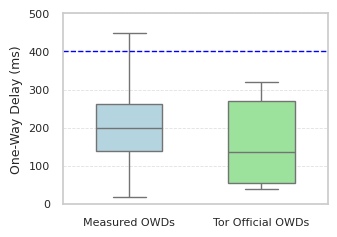

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

# === File Paths ===
base_dir = "/home/jithin/data/IMC/NewData/Tor"
tor_latency_file = "/home/jithin/data/AsiaCCS/Analysis/TP-OWD/onionperf-latencies-2025-04-01-2025-08-25-public.csv"

# === Extract Measured OWDs from log.json ===
owd_values = []

for root, _, files in os.walk(base_dir):
    for file in files:
        if file == "log.json":
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    for entry in data:
                        if "owd" in entry:
                            try:
                                owd_c2c = float(entry["owd"]["caller_to_callee"])
                                owd_c2c = owd_c2c if owd_c2c > 0 else None
                                owd_c2c and owd_values.append(owd_c2c)

                                owd_c2c = float(entry["owd"]["callee_to_caller"])
                                owd_c2c = owd_c2c if owd_c2c > 0 else None
                                owd_c2c and owd_values.append(owd_c2c)
                            except:
                                continue
                        elif "rtt" in entry and "avg" in entry["rtt"]:
                            try:
                                avg_rtt = float(entry["rtt"]["avg"])
                                owd = avg_rtt / 2 if avg_rtt > 0 else None
                                owd and owd_values.append(owd)
                            except:
                                continue
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

measured_owd = np.array(owd_values)
measured_owd = measured_owd[measured_owd > 0]


# === Extract Tor Official OWDs ===
try:
    tor_df = pd.read_csv(tor_latency_file)
    if {'date', 'md'}.issubset(tor_df.columns):
        tor_owd = (tor_df['md'] / 2).dropna()
        tor_owd = tor_owd[tor_owd > 0].values
    else:
        raise ValueError("Missing required columns 'date' and 'md'")
except Exception as e:
    print(f"Error reading Tor latency file: {e}")
    tor_owd = []

print("Total Number of measured OWDs: ",len(measured_owd))
print("Total Number of Tor OWDs: ",len(tor_owd))
# === Function to Print Box Summary ===
def summarize(data, label):
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lw = np.min(data[data >= q1 - 1.5 * iqr])
    uw = np.max(data[data <= q3 + 1.5 * iqr])
    within_whiskers = ((data >= lw) & (data <= uw)).sum()
    percentage = within_whiskers / len(data) * 100

    print(f"\n--- {label} ---")
    print(f"Q1: {q1:.2f} ms")
    print(f"Median: {q2:.2f} ms")
    print(f"Q3: {q3:.2f} ms")
    print(f"IQR: {iqr:.2f} ms")
    print(f"Lower Whisker: {lw:.2f} ms")
    print(f"Upper Whisker: {uw:.2f} ms")
    print(f"Percentage of values within whiskers: {percentage:.2f}%")

    return lw, uw

# === Summarize and Print Stats ===
summarize(measured_owd, "Measured OWDs")
summarize(tor_owd, "Tor Official OWDs")

# # === Plot Box Plot ===
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.boxplot([measured_owd, tor_owd],
#            labels=["Measured OWDs", "Tor Official OWDs"],
#            showfliers=False,
#            patch_artist=True,
#            boxprops=dict(facecolor="lightblue", color="black", linewidth=1.5),
#            medianprops=dict(color="darkred", linewidth=2),
#            whiskerprops=dict(color="black", linewidth=1.5),
#            capprops=dict(color="black", linewidth=1.5))

# ax.set_ylabel("One-Way Delay (ms)", fontsize=12)
# ax.set_title("OWD Distribution: Measured vs. Tor Official", fontsize=13)
# ax.set_ylim(0, 1000)
# ax.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.savefig("owd_boxplot.pdf")
# plt.show()

# === Prepare Data ===
df_plot = pd.DataFrame({
    "OWD (ms)": np.concatenate([measured_owd, tor_owd]),
    "Source": (["Measured OWDs"] * len(measured_owd)) + (["Tor Official OWDs"] * len(tor_owd))
})

# === Styling ===
sns.set_theme(style="whitegrid", font_scale=0.9, rc={
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "lines.linewidth": 1.2
})

# === Plot ===
fig, ax = plt.subplots(figsize=(3.5, 2.5))  # 1-column width

sns.boxplot(
    data=df_plot,
    x="Source",
    y="OWD (ms)",
    ax=ax,
    palette=["lightblue", "lightgreen"],
    width=0.5,
    showfliers=False  # <<< REMOVE OUTLIERS
)

# === Mark 400 ms Threshold ===
ax.axhline(y=400, linestyle='--', color='blue', linewidth=1.0)
# === Clean up ===
ax.set_xlabel("")
ax.set_ylabel("One-Way Delay (ms)")
ax.set_ylim(0, 500)
ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.6)

plt.tight_layout()
plt.savefig("owd_boxplot.pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()